In [2]:
# import the packages
import pandas as pd

# load the dataset
df = pd.read_csv(('/content/Batting summaries for every match.csv'))


In [3]:
# top 5 of the dataset.
k = df.head(5)
k

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,Match_Id
0,India Vs South Africa,India,1,Rohit Sharma,9,5,2,0,180,out,T20I # 2729
1,India Vs South Africa,India,2,Virat Kohli,76,59,6,2,128.81,out,T20I # 2729
2,India Vs South Africa,India,3,Rishabh Pant,0,2,0,0,0,out,T20I # 2729
3,India Vs South Africa,India,4,Suryakumar Yadav,3,4,0,0,75,out,T20I # 2729
4,India Vs South Africa,India,5,Axar Patel,47,31,1,4,151.61,out,T20I # 2729


In [4]:
# cjecking the null values.
null_counts = df.isnull().sum()
print("\nCount of null values in each column:")
print(null_counts)


Count of null values in each column:
match          0
teamInnings    0
battingPos     0
batsmanName    0
runs           0
balls          0
4s             0
6s             0
SR             0
out/not_out    0
Match_Id       0
dtype: int64


In [5]:
# shape of the data
df.shape

(852, 11)

In [6]:
# names of the columns.
df.columns

Index(['match', 'teamInnings', 'battingPos', 'batsmanName', 'runs', 'balls',
       '4s', '6s', 'SR', 'out/not_out', 'Match_Id'],
      dtype='object')

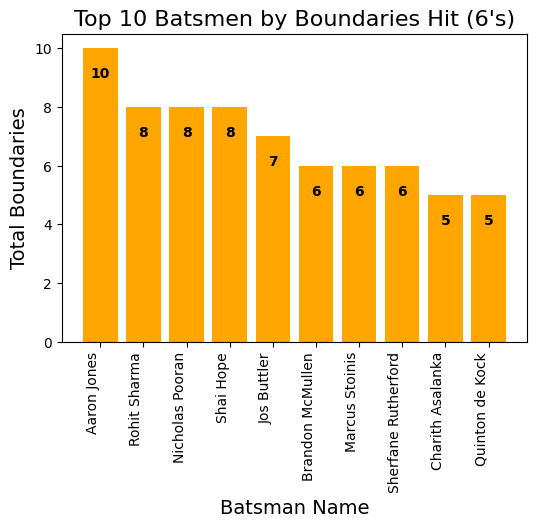

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_top_10_boundaries(df):
    """
    Plots a bar chart of the top 10 batsmen based on total boundaries (6's).

    Parameters:
    - df (DataFrame): A pandas DataFrame containing at least three columns:
        'batsmanName' (str): The name of the batsman.
        '6s' (int): The number of sixes hit by the batsman.
    """

    # Ensure '6s' column is numeric
    df["6s"] = pd.to_numeric(df["6s"], errors="coerce")

    # Calculate total boundaries for each batsman
    df["Total Boundaries"] =  df["6s"]

    # Sort to get the top 10 batsmen based on boundaries
    top_batsmen = df.sort_values(by="Total Boundaries", ascending=False).head(10)

    # Set the size of the figure
    plt.figure(figsize=(6, 4))

    # Create the bar plot
    plt.bar(top_batsmen["batsmanName"], top_batsmen["Total Boundaries"], color="orange")

    # Set the labels for x-axis and y-axis
    plt.xlabel("Batsman Name", fontsize=14)
    plt.ylabel("Total Boundaries", fontsize=14)

    # Add a title for the plot
    plt.title("Top 10 Batsmen by Boundaries Hit (6's)", fontsize=16)
    plt.xticks(rotation=90, ha='right')

    # Add annotations for each bar
    for index, value in enumerate(top_batsmen["Total Boundaries"]):
        plt.text(index, value-1, str(int(value)), ha='center', fontweight='bold')


    # Display the plot
    plt.show()

# Invoking the function
plot_top_10_boundaries(df)


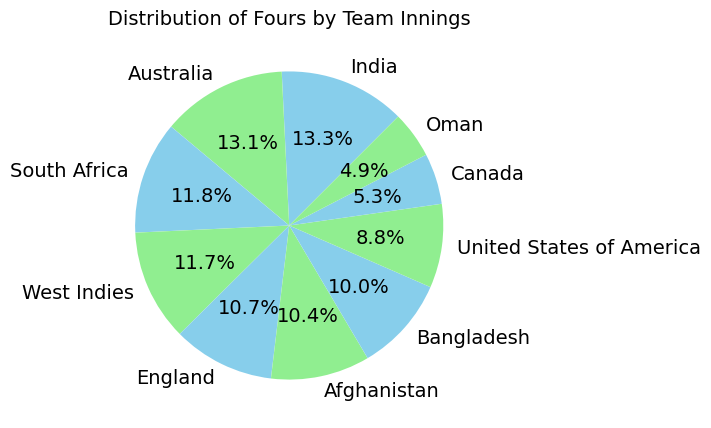

In [24]:
def plot_fours_distribution(df):
    """
    Creates a pie chart showing the distribution of fours hit by each team.

    Parameters:
    df (pd.DataFrame): DataFrame containing columns 'teamInnings' and '4s',
                       where 'teamInnings' indicates the team and '4s' represents
                       the number of fours hit by players in that team.

    Returns:
    None
    """
    # Summing up the fours for each team
    fours_by_team = df.groupby('teamInnings')['4s'].sum().nlargest(10)

    # Explode parameter to slightly separate slices
    explode = [0.0005] * len(fours_by_team)  # Adjust the separation for each slice

    # Define colors for each team
    colors = ['skyblue', 'lightgreen']  # Add more colors if more teams are present

    # Create the pie chart
    plt.figure(figsize=(5, 5))
    plt.pie(
        fours_by_team,
        labels=fours_by_team.index,
        autopct='%1.1f%%',
        startangle=45,
        colors=colors,         # Assign colors to each slice
        explode=explode,        # Separate each slice slightly for visibility
        textprops={'fontsize': 14}  # Set label font size
    )

    # Adding title
    plt.title("Distribution of Fours by Team Innings", fontsize=14)

    # Show the plot
    plt.show()

# Run the function
plot_fours_distribution(df)

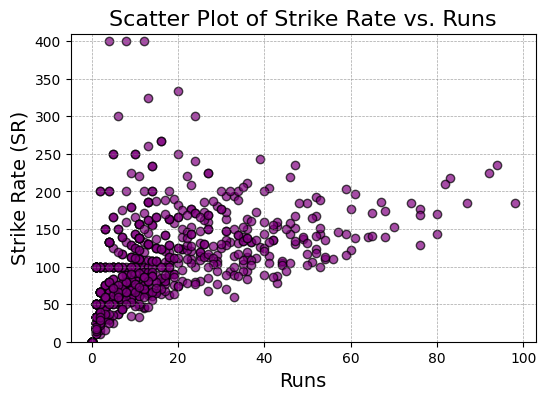

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_sr_vs_runs(df):
    """
    Plots an improved scatter plot of Strike Rate (SR) vs. Runs for each batsman.

    Parameters:
    - df (DataFrame): A pandas DataFrame containing at least two columns:
        'SR' (float): The strike rate of the batsman.
        'runs' (int): The runs scored by the batsman.
    """

    # Ensure SR and runs columns are numeric
    df["SR"] = pd.to_numeric(df["SR"], errors="coerce")
    df["runs"] = pd.to_numeric(df["runs"], errors="coerce")

    # Remove any rows with NaN values in SR or runs
    df = df.dropna(subset=["SR", "runs"])

    # Set the size of the figure
    plt.figure(figsize=(6, 4))

    # Create the scatter plot
    plt.scatter(df["runs"], df["SR"], color="purple", alpha=0.7, edgecolors="k")

    # Set the labels for x-axis and y-axis
    plt.xlabel("Runs", fontsize=14)
    plt.ylabel("Strike Rate (SR)", fontsize=14)

    # Add a title for the plot
    plt.title("Scatter Plot of Strike Rate vs. Runs", fontsize=16)

    # Set y-axis limits and add grid lines
    plt.ylim(0, max(df["SR"]) + 10)  # Adjusts y-axis to show a bit above the max SR
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    # Display the plot
    plt.show()

# Invoking the function
plot_sr_vs_runs(df)


In [10]:
# describe the data.
describe_1 = df.describe()
print(describe_1)

       battingPos        runs       balls          4s          6s          SR  \
count  852.000000  852.000000  852.000000  852.000000  852.000000  845.000000   
mean     5.016432   14.248826   12.957746    1.127934    0.606808   89.720355   
std      2.867577   17.035501   11.933840    1.648649    1.178180   65.208637   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      3.000000    2.000000    4.000000    0.000000    0.000000   42.850000   
50%      5.000000    9.000000    9.000000    0.000000    0.000000   85.710000   
75%      7.000000   20.000000   18.000000    2.000000    1.000000  130.550000   
max     11.000000   98.000000   59.000000    9.000000   10.000000  400.000000   

       Total Boundaries  
count        852.000000  
mean           0.606808  
std            1.178180  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            1.000000  
max           10.000000  


In [11]:
# correlation

df_correlation = df.corr(numeric_only=True)
print(df_correlation)

                  battingPos      runs     balls        4s        6s  \
battingPos          1.000000 -0.335623 -0.353146 -0.357374 -0.212685   
runs               -0.335623  1.000000  0.893979  0.819465  0.799362   
balls              -0.353146  0.893979  1.000000  0.724450  0.584513   
4s                 -0.357374  0.819465  0.724450  1.000000  0.436094   
6s                 -0.212685  0.799362  0.584513  0.436094  1.000000   
SR                 -0.136549  0.572876  0.340482  0.495710  0.541681   
Total Boundaries   -0.212685  0.799362  0.584513  0.436094  1.000000   

                        SR  Total Boundaries  
battingPos       -0.136549         -0.212685  
runs              0.572876          0.799362  
balls             0.340482          0.584513  
4s                0.495710          0.436094  
6s                0.541681          1.000000  
SR                1.000000          0.541681  
Total Boundaries  0.541681          1.000000  


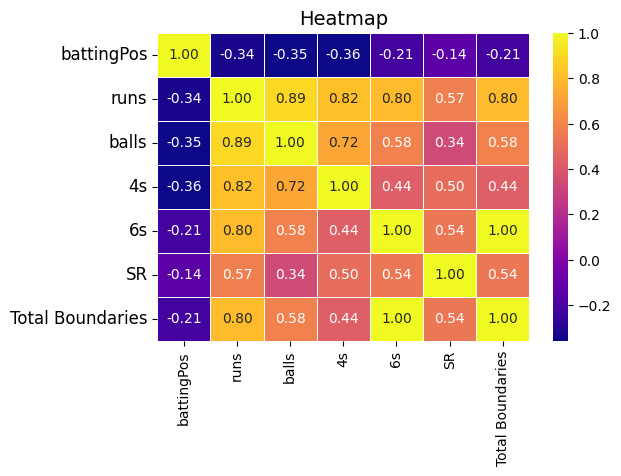

In [12]:
import seaborn as sns

def plot_heatmap(df_correlation):
    """
    Plotting a heatmap of the correlation matrix.

    Parameters:
        correlation_matrix (DataFrame): Correlation matrix data.
        title (str, optional): Title of the plot. Defaults to 'Heatmap of Correlation matrix'.
    """
    plt.figure(figsize=(6, 4))
    # constructing the plot for  correlation matrtix
    sns.heatmap(df_correlation, annot=True, cmap='plasma', linewidths=0.5, fmt='.2f', linecolor='white')
    # title for the heatmap
    plt.title("Heatmap", fontsize=14)
    # add the x ticks and y ticks.
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=12)
    # view the plot.
    plt.show()

# Calling the function.
plot_heatmap(df_correlation)

In [13]:
def mean_for_columns():

  """
    Calculating mean of the columns, using loop.
    Mean(): pre-defined module, imported from Statistics library.

  """
  for i in all_columns:
    mean_value = df[i].mean()
    print("Mean of", i, ":", mean_value)

all_columns = ['battingPos','runs', 'balls',
       '4s', '6s', 'SR']
mean_for_columns()


Mean of battingPos : 5.016431924882629
Mean of runs : 14.248826291079812
Mean of balls : 12.95774647887324
Mean of 4s : 1.1279342723004695
Mean of 6s : 0.6068075117370892
Mean of SR : 89.72035502958578


In [14]:
def median_for_columns():

  """
    Calculating median of the columns, using loop.
    median(): pre-defined module, imported from Statistics library.

  """
  for i in all_columns:
    median_value = df[i].median()
    print("median of", i, ":", median_value)
all_columns = ['battingPos', 'runs', 'balls',
       '4s', '6s', 'SR']
median_for_columns()

median of battingPos : 5.0
median of runs : 9.0
median of balls : 9.0
median of 4s : 0.0
median of 6s : 0.0
median of SR : 85.71


In [15]:
def standard_deviation_for_columns():

  """
    Calculating standard deviation of the columns, using loop.
    standard_deviation(): pre-defined module, imported from Statistics library.

  """
  for i in all_columns:
    standard_deviation_value = df[i].std()
    print("Standard Deviation of", i, ":", standard_deviation_value)

all_columns = ['battingPos', 'runs', 'balls',
       '4s', '6s', 'SR']
standard_deviation_for_columns()


Standard Deviation of battingPos : 2.8675767504231087
Standard Deviation of runs : 17.035500667491867
Standard Deviation of balls : 11.933840283699537
Standard Deviation of 4s : 1.6486490443240112
Standard Deviation of 6s : 1.1781802557168974
Standard Deviation of SR : 65.2086371366538


In [16]:
def skewness_for_columns():

  """
    Calculating skewness of the columns, using loop.
    skew(): pre-defined module, imported from Statistics library.

  """
  for i in all_columns:
    skewness_value = df[i].skew()
    print("skewness of", i, ":", skewness_value)

all_columns = ['battingPos', 'runs', 'balls',
       '4s', '6s', 'SR']
skewness_for_columns()

skewness of battingPos : 0.3371224578075786
skewness of runs : 1.8104348766250435
skewness of balls : 1.374304645547509
skewness of 4s : 1.9775342574810508
skewness of 6s : 3.081181448936265
skewness of SR : 0.7867635532360981


In [17]:
def kurtosis_for_columns():

  """
    Calculating kurtosis of the columns, using loop.
    kurtosis(): pre-defined module, imported from Statistics library.

  """
  for i in all_columns:
    kurtosis_value = df[i].kurtosis()
    print("kurtosis of", i, ":", kurtosis_value)

all_columns = ['battingPos', 'runs', 'balls',
       '4s', '6s', 'SR']
kurtosis_for_columns()


kurtosis of battingPos : -0.9059755087925616
kurtosis of runs : 3.564723718775596
kurtosis of balls : 1.4661627426946304
kurtosis of 4s : 4.340180870458241
kurtosis of 6s : 13.196922603749567
kurtosis of SR : 1.4274208220445033
